In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

In [3]:
data = pd.read_csv('D:/Project/dataset/heart/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

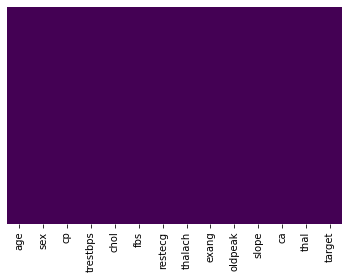

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='target', ylabel='count'>

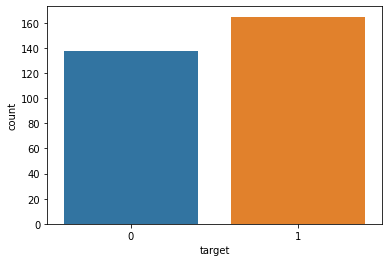

In [7]:
sns.countplot(x='target',data=data)

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

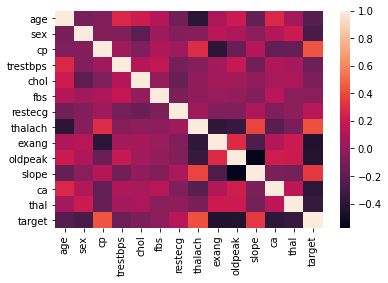

In [9]:
sns.heatmap(data.corr())

In [10]:
data = data.drop(['thal','ca','oldpeak','exang'], axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,slope,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,2,1
3,56,1,1,120,236,0,1,178,2,1
4,57,0,0,120,354,0,1,163,2,1


In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,slope
0,63,1,3,145,233,1,0,150,0
1,37,1,2,130,250,0,1,187,0
2,41,0,1,130,204,0,0,172,2
3,56,1,1,120,236,0,1,178,2
4,57,0,0,120,354,0,1,163,2


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,slope
132,42,1,1,120,295,0,1,162,2
202,58,1,0,150,270,0,0,111,2
196,46,1,2,150,231,0,1,147,1
75,55,0,1,135,250,0,0,161,1
176,60,1,0,117,230,1,1,160,2
...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,1
71,51,1,2,94,227,0,1,154,2
106,69,1,3,160,234,1,0,131,1
270,46,1,0,120,249,0,0,144,2


In [15]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,slope
179,57,1,0,150,276,0,0,112,1
228,59,1,3,170,288,0,0,159,1
111,57,1,2,150,126,1,1,173,2
246,56,0,0,134,409,0,0,150,1
60,71,0,2,110,265,1,0,130,2
...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,1
104,50,1,2,129,196,0,1,163,2
300,68,1,0,144,193,1,1,141,1
193,60,1,0,145,282,0,0,142,1


In [16]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [17]:
reg2 = LogisticRegression(solver='lbfgs',max_iter=1000)
reg2

LogisticRegression(max_iter=1000)

In [18]:
reg2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
predictions = reg2.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [22]:
filename = 'heart-model'
joblib.dump(reg2, filename)

['heart-model']